In [1]:
using Pkg
pkg"activate ."
pkg"instantiate"
pkg"precompile"

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Precompiling project...


In [2]:
using PerlaTonettiWaugh, Plots, BenchmarkTools

In [3]:
gr(fmt = :png)

Plots.GRBackend()

# Steady states

## Solving steady state solutions

Set up parameters and find the corresponding stationary solution:

In [4]:
# Define common objects. 
parameters = parameter_defaults()

settings = settings_defaults()
settings = merge(settings, (transition_penalty_coefficient = 1.0, ))
z_grid = settings.z
M = length(z_grid)

d_0 = parameters.d_0
d_T = parameters.d_T
params_0 = merge(parameters, (d = d_0,)) # parameters to be used at t = 0
params_T = merge(parameters, (d = d_T,)) # parameters to be used at t = T

# solve for stationary solution at t = 0
stationary_sol_0 = stationary_algebraic(params_0) # solution at t = 0
stationary_sol = stationary_algebraic(params_T) # solution at t = T

Ω_0 = stationary_sol_0.Ω;
Ω_T = stationary_sol.Ω;

## Welfare in steady states

### Steady state at `T`

In [5]:
display_stationary_sol(stationary_sol);

g = 0.020368220636867503
z_hat = 1.3975965102352352
Ω = 1.2422148378291198
y = 1.313850473425199
c = 1.313850473425199
U_bar = getfield(PerlaTonettiWaugh, Symbol("##46#47")){Float64,Float64,Float64,Float64}(0.020368220636867503, 0.02, 1.0, 1.313850473425199)
λ_ii = 0.7537959721814094
L_tilde = 0.20665697376969933
z_bar = 1.6560938080822045
w = 0.41510271909018565
x = 1.0
π_min = 0.0587315694968123
r = 0.0933682206368675
a = 9.223454581766575
b = 0.13781315332830293
S = 0.03273273541259847


### Steady state at `0`

In [6]:
display_stationary_sol(stationary_sol_0);

g = 0.013541610519137154
z_hat = 1.6200828010960542
Ω = 1.5711659236603532
y = 1.3857549789533123
c = 1.3857549789533123
U_bar = getfield(PerlaTonettiWaugh, Symbol("##46#47")){Float64,Float64,Float64,Float64}(0.013541610519137154, 0.02, 1.0, 1.3857549789533123)
λ_ii = 0.8467129724642012
L_tilde = 0.1958061138264229
z_bar = 1.723160300990166
w = 0.4319130491753976
x = 1.0
π_min = 0.05287232733134978
r = 0.08654161051913715
a = 11.362291825104265
b = 0.15673177986708509
S = 0.0006067081985594449


# Transition dynamics

Setup for optimizer:

In [7]:
settings = merge(settings, (params_T = params_T, stationary_sol_T = stationary_numerical(params_T, z_grid), Ω_0 = Ω_0, transition_iterations = 0));

Find the corresponding solution

In [8]:
@time result = solve_full_model(settings; impose_E_monotonicity_constraints = true)
solved = result.solution;
E_nodes = result.E_nodes;

132.191164 seconds (152.38 M allocations: 10.960 GiB, 7.12% gc time)


In [9]:
println("E_nodes (sorted) : ")
sort(E_nodes)

E_nodes (sorted) : 


14-element Array{Float64,1}:
 -0.91839  
 -0.797426 
 -0.61209  
 -0.500276 
 -0.319928 
 -0.235112 
 -0.235112 
 -0.121364 
 -0.100241 
 -0.0801344
 -0.049003 
 -0.040901 
 -0.040901 
 -0.0178076

In [10]:
@show E_nodes

E_nodes = [-0.91839, -0.797426, -0.61209, -0.500276, -0.319928, -0.235112, -0.235112, -0.121364, -0.100241, -0.0801344, -0.049003, -0.040901, -0.040901, -0.0178076]


14-element Array{Float64,1}:
 -0.91839  
 -0.797426 
 -0.61209  
 -0.500276 
 -0.319928 
 -0.235112 
 -0.235112 
 -0.121364 
 -0.100241 
 -0.0801344
 -0.049003 
 -0.040901 
 -0.040901 
 -0.0178076

## Plots for Ω and residuals

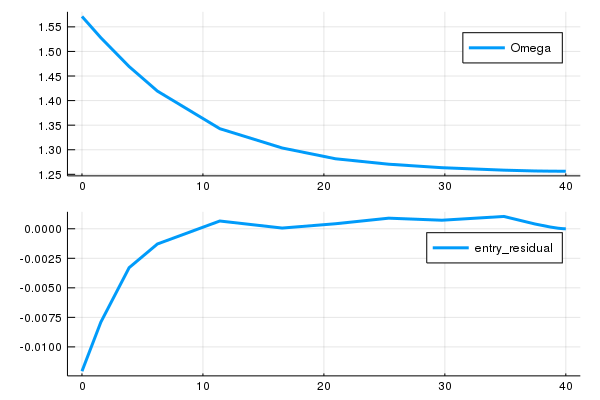

In [11]:
solved = solved.results;
plot_Ω = plot(solved.t, solved.Ω, label = "Omega", lw = 3)
plot_residual = plot(solved.t, solved.entry_residual, label = "entry_residual", lw = 3)
plot(plot_Ω, plot_residual, layout = (2,1))

## Primary Plots

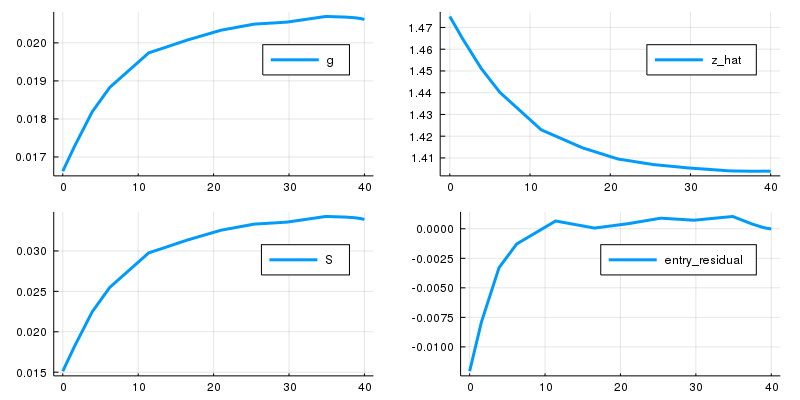

In [12]:
plot1 = plot(solved.t, solved.g, label = "g", lw = 3)
plot2 = plot(solved.t, solved.z_hat, label = "z_hat", lw = 3)
plot3 = plot(solved.t, solved.S, label = "S", lw = 3)
plot4 = plot(solved.t, solved.entry_residual, label = "entry_residual", lw = 3)
plot(plot1, plot2, plot3, plot4, layout=(2,2), size = (800, 400))

## Static Equations

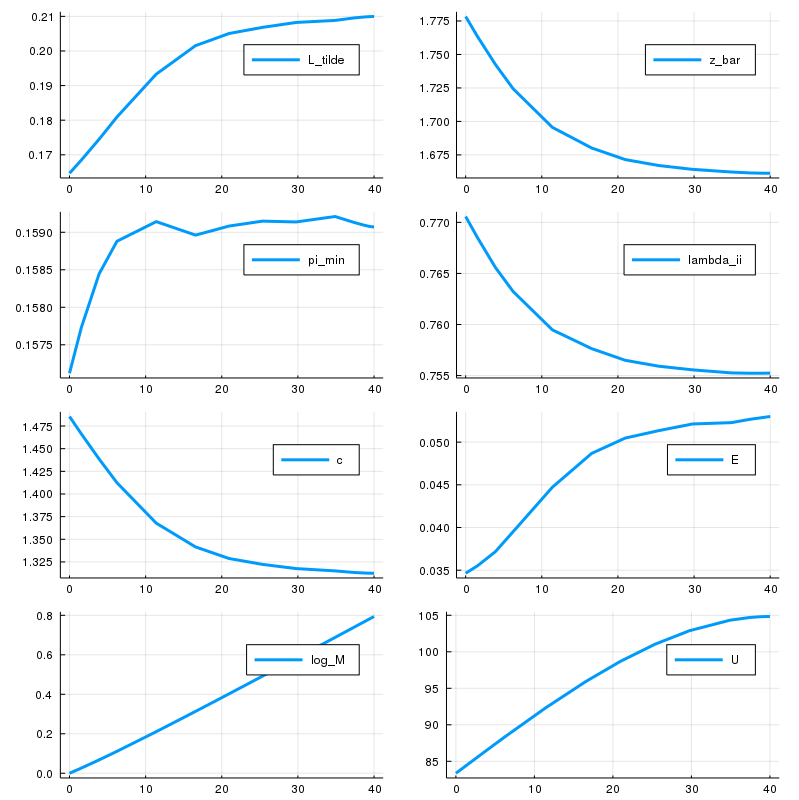

In [13]:
plot1 = plot(solved.t, solved.L_tilde, label = "L_tilde", lw = 3)
plot2 = plot(solved.t, solved.z_bar, label = "z_bar", lw = 3)
plot3 = plot(solved.t, solved.π_min, label = "pi_min", lw = 3)
plot4 = plot(solved.t, solved.λ_ii, label = "lambda_ii", lw = 3)
plot5 = plot(solved.t, solved.c, label = "c", lw = 3)
plot6 = plot(solved.t, solved.E, label = "E", lw = 3)
plot7 = plot(solved.t, solved.log_M, label = "log_M", lw = 3)
plot8 = plot(solved.t, solved.U, label = "U", lw = 3)
plot(plot1, plot2, plot3, plot4, plot5, plot6, plot7, plot8, layout=(4,2), size = (800, 800))

# Welfare analysis

### `log_M(t)`

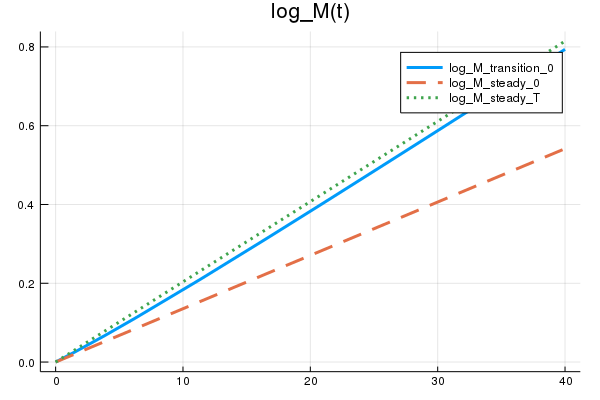

In [14]:
# define log_M with steady state g
log_M_steady_0(t) = stationary_sol_0.g * t
log_M_steady_T(t) = stationary_sol.g * t

# generate the plot!
plot(solved.t, 
    [solved.log_M, log_M_steady_0, log_M_steady_T], 
    label = ["log_M_transition_0", "log_M_steady_0", "log_M_steady_T"] ,
    title = "log_M(t)", linestyle = :auto, lw = 3)

### `Ω(t)`

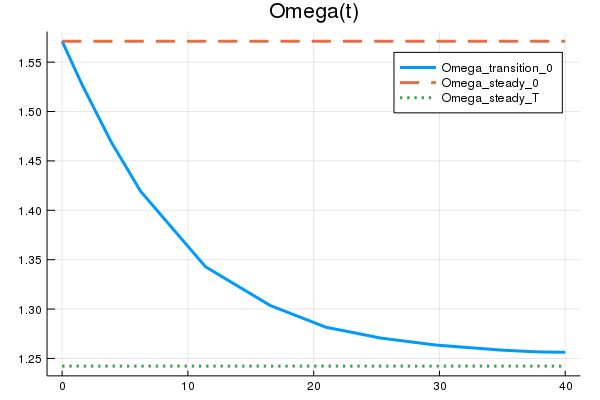

In [15]:
# define Ω function (constant)
Ω_steady_0(t) = stationary_sol_0.Ω
Ω_steady_T(t) = stationary_sol.Ω

# generate the plot!
plot(solved.t, 
    [solved.Ω, Ω_steady_0, Ω_steady_T], 
    label = ["Omega_transition_0", "Omega_steady_0", "Omega_steady_T"] ,
    title = "Omega(t)", linestyle = :auto, lw = 3)

### `c(t)`

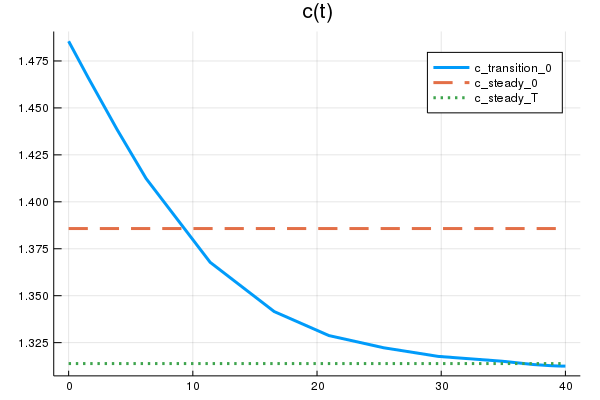

In [16]:
# define c function (constant)
c_steady_0(t) = stationary_sol_0.c
c_steady_T(t) = stationary_sol.c

# generate the plot!
plot(solved.t, 
    [solved.c, c_steady_0, c_steady_T], 
    label = ["c_transition_0", "c_steady_0", "c_steady_T"] ,
    title = "c(t)", linestyle = :auto, lw = 3)

### `U(t)`

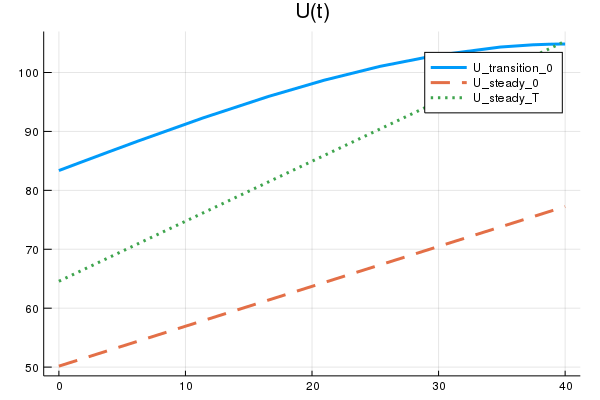

In [17]:
# generate the plot!
plot(solved.t, 
    [solved.U, stationary_sol_0.U_bar, stationary_sol.U_bar], 
    label = ["U_transition_0", "U_steady_0", "U_steady_T"] ,
    title = "U(t)", linestyle = :auto, lw = 3)

## Consumption equivalent for search threshold (`M(0)`)
See computational appendix for details.

### `M(0)` by two steady states (autarky and steady state at `T`)

In [18]:
T = solved.t[end]
consumption_equivalent(solved.U[end], stationary_sol_0.U_bar(T), parameters)

1.7360602211620562

### `M(0)` by autarky and transition from `t=0`

In [19]:
T = solved.t[end]
consumption_equivalent(solved.U[1], stationary_sol_0.U_bar(T), parameters)

1.1300506053614638

### Continuation Approach

The cell below takes a while to run, but is a relatively robust way to get the solution. 

In [20]:
#= solve_continuation(3.07, # d_0 value
                        2.5019, # d_T value
                        step = 0.05, # default is 0.005 
                        params = parameter_defaults(), 
                        settings = settings_defaults(),
                        solver = solve_full_model_dfols)
=#